# 🏈 Super Bowl Data Analysis

In this notebook, we’ll explore Super Bowl data to answer the following:

1. Has TV viewership increased over time?
2. How many matches had a point difference greater than 40?
3. Who performed the most songs during halftime shows?

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading data into dataframes
halftime_musicians = pd.read_csv('halftime_musicians.csv')
tv = pd.read_csv('tv.csv')
super_bowls = pd.read_csv('super_bowls.csv')

In [3]:
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [4]:
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [5]:
super_bowls.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


## 📊 1. Viewership Over Time

We’ll use matplotlib to visualize whether average U.S. viewership has increased over time.


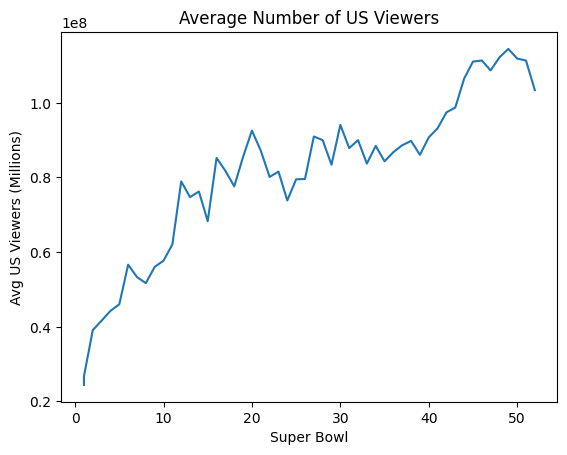

Super Bowl viewership increased over time: True


In [11]:
tv_sorted = tv.sort_values("super_bowl")
viewership_increased = tv_sorted["avg_us_viewers"].iloc[-1] > tv_sorted["avg_us_viewers"].iloc[0]

plt.plot(tv_sorted.super_bowl, tv_sorted.avg_us_viewers)
plt.title('Average Number of US Viewers')
plt.xlabel('Super Bowl')
plt.ylabel('Avg US Viewers (Millions)')
plt.show()

print(f"Super Bowl viewership increased over time: {viewership_increased}")


## 🧮 2. Point Differences

Let’s calculate how many Super Bowl games ended with a large point difference (>40 points).


In [14]:
difference = (super_bowls["difference_pts"] > 40).sum()
print("Games with point difference > 40:", difference)


Games with point difference > 40: 1


## 🎤 3. Halftime Show Performers

Who brought the most energy? Let’s find out who performed the most songs during Super Bowl halftime shows.


In [13]:
most_songs = (
    halftime_musicians.groupby("musician")["num_songs"]
    .sum()
    .sort_values(ascending=False)
    .idxmax()
)
print("Performer with most songs:", most_songs)

Performer with most songs: Justin Timberlake
